# Assignment 3 - Supervised Learning

## Varun Prasad
Netid: vp60

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

## Learning Objectives:
This assignment will provide structured practice to help enable you to...
1. Understand the primary workflow in machine learning: (1) identifying a hypothesis function set of models, (2) determining a loss/cost/error/objective function to minimize, and (3) minimizing that function through gradient descent
2. Implement batch gradient descent and become familiar with how that technique is used and its dependence on the choice of learning rate
3. Gain practice in implementing machine learning algorithms to understand the math and programming behind them to achieve practical proficiency with the techniques
4. Evaluate supervised learning algorithm performance through ROC curves and using cross validation
5. Work with imagery data and the basics of computer vision approaches to machine learning
6. Develop an understanding the optimal minimum misclassification error classifier (Bayes' classifier)

In [79]:
# MAC USERS TAKE NOTE:
# For clearer plots in Jupyter notebooks on macs, run the following line of code:
# config InlineBackend.figure_format = 'retina'

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \dfrac{e^x}{1+e^{x}}= \dfrac{1}{1+e^{-x}}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^{\intercal} \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $\mathbf{x}_i=[x_{i,0}, x_{i,1}, x_{i,2}]^{\intercal}$, and $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model parameters. For one sample, $(y_i, \mathbf{x}_i)$, this is given as:

$$P(Y=y_i|X=\mathbf{x}_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)$$

*Aside: the careful reader will recognize this expression looks different from when we talk about the likelihood of our data given the true class label, typically expressed as $P(x|y)$, or the posterior probability of a class label given our data, typically expressed as $P(y|x)$. In the context of training a logistic regression model, we know the training $\mathbf{x}$ values and $y$ values, so the above probability is primarily a function of the logistic regression parameters, $\mathbf{w}$. It's our goal to use this to choose the parameters to maximize the probability of our data by adjusting our model*

#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function for all the $N$ samples in our training dataset that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\dfrac{\partial C}{\partial w_0}, \dfrac{\partial C}{\partial w_1}, \dfrac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]^{\intercal}$, and output the class confidence probabilities, $P(Y=y_i|X=\mathbf{x}_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm.  In doing this we'll need to make some assumptions about and/or experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.
3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.

Please compute your cost function for a batch as the average cost for the data in your current batch (in this case, a batch is your entire training dataset). In other words, divide your cost by the number of samples in each batch.

**(j)** Design your approach so that at each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data (no output is necessary here, but this is used in the following question).

**(k)** Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent. Show the gradient descent process for different learning rates by plotting the resulting cost as a function of each iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question. 

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatter-plot and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?

**ANSWER**
#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(a)** 

The likelihood function that we wish to maximize written with the following equation:
$$\boxed{P(\mathbf{y|X}) = \prod_{i = 1}^{N}P(y_i|\mathbf{x}_i) = \prod_{i=1}^{N}\sigma(\mathbf{w}^{T}\mathbf{x}_i)^{y_i}[1-\sigma(\mathbf{w}^{T}\mathbf{x}_i)]^{1-y_i}}$$ where $\sigma(\mathbf{w}^{T}\mathbf{x}_i)= \frac{1}{1+e^{-\mathbf{w}^{T}\mathbf{x}_i}}$

**(b)** 

The cost function is written as follows:
$$ \boxed{C(\textbf{w}) = -\text{log}P(\mathbf{y|X}) = -\sum_{i = 1}^{N}y_i\text{log}(\hat{y}_i) + (1- y_i)\text{log}(1-\hat{y}_i)}$$
where $\hat{y}_i \triangleq \sigma(\mathbf{w}^{T}\mathbf{x}_i) = \frac{1}{1+e^{-\mathbf{w}^{T}\mathbf{x}_i}}$ for logistic regression

**(c)** 

To simplify computation of the gradient, a couple substitutions are made, shown as follows:
$$\mathbf{w}^{T}\mathbf{x}_i = z; \ \sigma(z) = \hat{y}_i = p$$

The general computation of the of a gradient component is as follows:
$$\frac{\partial C}{\partial w_j} = \frac{\partial C}{\partial p} \cdot \frac{\partial p}{\partial z} \cdot \frac{\partial z}{\partial w_j}$$

The values of $\frac{\partial z}{\partial w_j}$ are as follows:
$$\left[\dfrac{\partial C}{\partial w_0}, \dfrac{\partial C}{\partial w_1}, \dfrac{\partial C}{\partial w_2}\right]
= \left[1, x_{i,1}, x_{i,2}\right]$$

It should also be noted that the derivative of the sigmoid function is the following, as found [here](https://math.stackexchange.com/questions/78575/derivative-of-sigmoid-function-sigma-x-frac11e-x):
$$\frac{d}{dx}\sigma(x) = \sigma(x) \cdot (1 - \sigma(x))$$

The gradient of the cost function is computed as follows:
$$\nabla_w C(\mathbf{w}) = - \nabla_w \sum_{i = 1}^{N}y_i\text{log}(\hat{y}_i) + (1- y_i)\text{log}(1-\hat{y}_i) = $$
$$-\sum_{i = 1}^{N}y_i\ \cdot \frac{1}{p} \cdot (p(1 - p)) \cdot \frac{\partial z}{\partial w_j}
+ (1-y_i) \frac{1}{1-p} \cdot (p(1 - p)) \cdot \frac{\partial z}{\partial w_j} =$$ 

$$-\sum_{i = 1}^{N}y_i\ \cdot (1 - p) \cdot \frac{\partial z}{\partial w_j}
+ (1-y_i) p \cdot \frac{\partial z}{\partial w_j} =$$  

$$-\sum_{i = 1}^{N}(p - y_i)\frac{\partial z}{\partial w_j} =$$ 
$$-\sum_{i = 1}^{N}(\hat{y} - y_i)\frac{\partial z}{\partial w_j} $$

After incorporating $\textbf{w}$ in the partial derivative calculation, we obtain the final result for the gradient:
$$\boxed{\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\dfrac{\partial C}{\partial w_0}, \dfrac{\partial C}{\partial w_1}, \dfrac{\partial C}{\partial w_2}\right] = \left[-\sum_{i = 1}^{N}(\hat{y} - y_i), -\sum_{i = 1}^{N}(\hat{y} - y_i)x_{i,1}, -\sum_{i = 1}^{N}(\hat{y} - y_i)x_{i,2} \right]}$$
where $\hat{y}_i \triangleq \sigma(\mathbf{w}^{T}\mathbf{x}_i) = \frac{1}{1+e^{-\mathbf{w}^{T}\mathbf{x}_i}}$ for logistic regression.

**(d)** 

The general gradient descent update function is the following: 
$$x_{i+1} = x_i+\eta\nu = x_i + \eta \nabla f(x^{(i)})$$

For this function, we are focused on updating $\textbf{w}$, which results in the following gradient descent equation:
$$\boxed{\left[w_{j+1,0}, w_{j+1,1}, w_{j+1,2}\right] = \left[w_{j,0}, w_{j,1}, w_{j,2}\right] - \eta \left[-\sum_{i = 1}^{N}(\hat{y} - y_i), -\sum_{i = 1}^{N}(\hat{y} - y_i)x_{i,1}, -\sum_{i = 1}^{N}(\hat{y} - y_i)x_{i,2} \right]} $$
where $\hat{y}_i \triangleq \sigma(\mathbf{w}^{T}\mathbf{x}_i) = \frac{1}{1+e^{-\mathbf{w}^{T}\mathbf{x}_i}}$ for logistic regression.

#### Prepare and plot your data

**(e)** The data is loaded and plotted. The plot of the data is shown below.

In [53]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import data 
q1 = pd.read_csv('A3_Q1_data.csv')

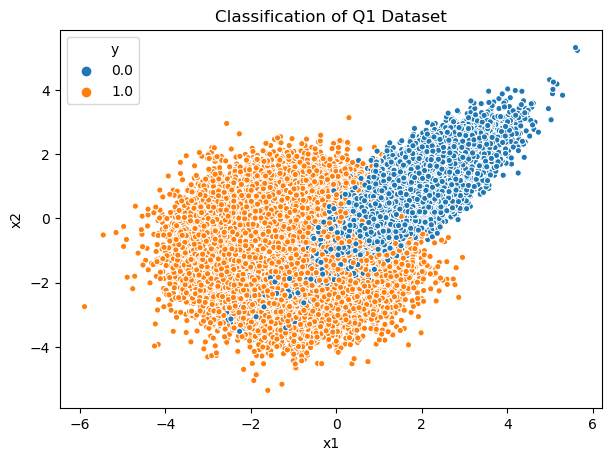

In [54]:
# Plot data
plt.figure(figsize = (7,5), dpi = 100)
q1_plot = sns.scatterplot('x1','x2', hue = 'y', data = q1, s = 20)
q1_plot.set_title('Classification of Q1 Dataset')
plt.show()

Based on the plot above, the data show a large amount of overlap, particularly when the value of x1 is between -2 and 2. Logistic regressions work better when the data is more clearly separated, so a logistic model may not work well here. We will likely need to apply some variable transformations. 

**(f)** Based on the plot above and the summary statistics of the data, shown below, there are no preprocessing steps that are required. There are no missing values and the x1 and x2 values are on the same scale. We can proceed with analysis.  

In [55]:
# Determine balance and check for missing values
print('Summary of Data')
print(q1.describe())

# Determine number of missing values
print()
print('Counts of missing values')
print(q1.isnull().sum())

Summary of Data
                  x1             x2              y
count  100000.000000  100000.000000  100000.000000
mean        0.048529      -0.397106       0.500000
std         1.452409       1.164015       0.500003
min        -5.886436      -5.352265       0.000000
25%        -1.041007      -1.206343       0.000000
50%         0.039551      -0.401099       0.500000
75%         1.143536       0.402899       1.000000
max         5.634476       5.317718       1.000000

Counts of missing values
x1    0
x2    0
y     0
dtype: int64


#### Implement gradient descent and your logistic regression algorithm

**(g-j)** The class below contains the probability, cost, and gradient descent functions necessary for the logistic regression. All functions are labelled with the respective part. The gradient descent algorithm also allows for the costs to be collected in a list and will also return the final optimized w values. Constructing the class was done with help from this [source](https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac).

In [56]:
# Import numpy
import numpy as np

# Logistic regression class
class logistic:
    # Initialization function
    def __init__(self,x,y,intercept = True):
        if intercept:
            intercept = np.ones(x.shape[0]).reshape(-1,1)
            x_constant = np.concatenate((intercept, x), axis = 1)
            self.x = x_constant
            self.y = y
        else:
            self.x = x
            self.y = y 
            pass
    
    # Sigmoid function for probability of each class (g)
    def probability(self,w):
        prob = (1 / (1 + np.exp(-self.x@w.T)))
        return prob
    
    # Cost function (h)
    def cost(self, w):
        pred = self.probability(w)
        cost = -(np.sum(self.y*np.log(pred)+(1-self.y)*np.log(1-pred))) / self.y.shape[0]
        return cost
    
    # Gradient descent function (i,j)
    def gradient_descent(self, learning_rate, stop_criteria):
        # Initialize parameters as random between 0 and 1
        np.random.seed(234) # Ensures consistent start in function
        w_init = np.random.rand(self.x.shape[1])
        
        # Initialize difference as norm of w_init
        diff = 1
        
        # Initialize cost lists
        costs = []
        
        # Calculate gradient and update weights after one step based on difference of norms (j)
        while diff >= stop_criteria:
            costs.append(self.cost(w_init))
            w_init_norm = np.linalg.norm(w_init)
            gradient = (self.x.T@(self.probability(w_init)-self.y)) /self.y.shape[0]
            w_new = w_init - learning_rate*gradient
            w_new_norm = np.linalg.norm(w_new)
            diff = abs(w_new_norm - w_init_norm)
            w_init = w_new
        return w_init, costs
    pass

**(k)**  Using the sklearn train_test_split method, the full data is divided into 70% for training and 30% for test. The plots for different learning rates on the training and test data are shown below. A random seed is set to ensure consistency across all the tests. 

In [57]:
# Train and test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(q1, test_size = 0.3)
x_train = train[['x1','x2']].to_numpy()
y_train = train['y'].to_numpy()
x_test = test[['x1','x2']].to_numpy()
y_test = test['y'].to_numpy()

# Initialize logstic regression models
train_log = logistic(x_train,y_train)
test_log = logistic(x_test,y_test)

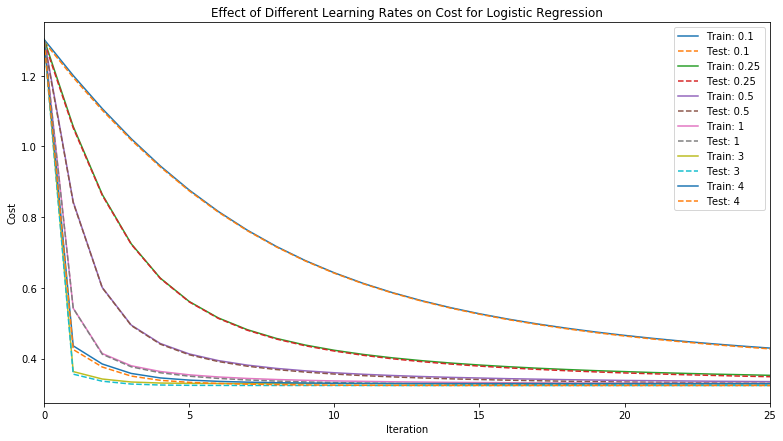

In [58]:
# Plot cost as a function of iteration based on learning rate
import matplotlib.pyplot as plt
import seaborn as sns

# Create list of learning rates
rates = [0.1, 0.25, 0.5,1,3,4]
stop_criteria = 1e-06

# Create list of costs for train and test data and plot
plt.figure(figsize = (13,7))
for eta in rates:
    w_train, train_costs = train_log.gradient_descent(eta, stop_criteria)
    w_test, test_costs = test_log.gradient_descent(eta, stop_criteria)
    plt.plot(train_costs, label = f'Train: {eta}')
    plt.plot(test_costs, label = f'Test: {eta}', linestyle = 'dashed')
    pass

plt.xlim(0,25)
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.title('Effect of Different Learning Rates on Cost for Logistic Regression')
plt.legend()
plt.show()

Based on the plot above, a learning rate of 3 appears to be the best since it converges fastest for both training and test data. The dashed blue line is the most clear indicator of the learning rate of 3 being optimal. It can be seen that learning rates below 1 have slow convergence and require many more iterations, even beyond the limit of 25 shown in the graph. Learning rates above 3 also converge more slowly, and in some cases, it is possible that having too high of a learning rate will cause the algorithm to miss the minimum point, resulting in no convergence. Note that a random seed was set to ensure that the initial cost was the same for all learning rates in the gradient descent function. 

#### Test your model performance through cross validation

**(l)** The code and plot below show the method behind and results of cross-validation using 5 folds. The predicted probabilities on each validation fold are aggregated and compared to their respective values in the training data. The ROC curve is plotted, and the AUC was determined to be 0.933, suggesting strong generalizability. 

In [59]:
# (l) Cross validation 
from sklearn import model_selection

# Create 5 folds
kf = model_selection.StratifiedKFold(n_splits = 5, shuffle = True)
preds = np.empty(y_train.shape[0],dtype = 'object')

# Set up gradient descent and probabilities
eta = 3
stop = 1e-6

# Perform cross validation
for train_ind, val_ind in kf.split(x_train, y_train):
    # Extract training and validation data for fold
    x_train_cv, x_val_cv = x_train[train_ind], x_train[val_ind]
    y_train_cv, y_val_cv = y_train[train_ind], y_train[val_ind]
    
    # Create logistic regression objects
    train_log_cv = logistic(x_train_cv, y_train_cv)
    val_log_cv = logistic(x_val_cv,y_val_cv)
    
    # Obtain parameter of w using learning rate of 3 on training fold
    w_train = train_log_cv.gradient_descent(eta, stop)[0]
    
    # Predict on validation fold and add to array
    preds[val_ind] = val_log_cv.probability(w_train)    

The AUC for the cross-validation is 0.933


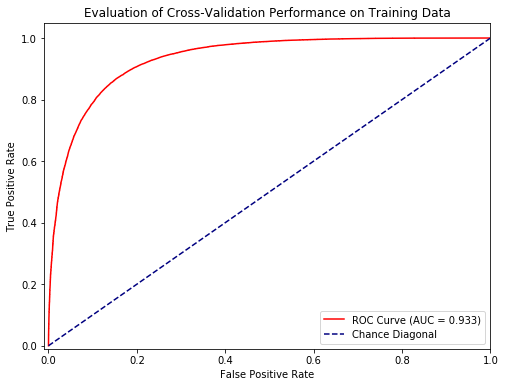

In [60]:
# (l) Compute metrics and plot ROC curve
from sklearn import metrics

# AUC
fpr,tpr,threshold = metrics.roc_curve(y_train, preds, pos_label = 1)
print(f'The AUC for the cross-validation is {round(metrics.auc(fpr,tpr),4)}')

# Plot ROC curve
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, color = 'red', label = f'ROC Curve (AUC = {round(metrics.auc(fpr,tpr),4)})')
plt.plot([0,1],[0,1],color = 'navy', linestyle = '--', label = 'Chance Diagonal')
plt.xlim(-0.01,1)
plt.ylim(-0.01,1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Evaluation of Cross-Validation Performance on Training Data')
plt.legend(loc = 'lower right')
plt.show()

**(m)** Cross-validation is used for both model performance and model assessment. For model performance, cross-validation can be used for finding the optimal hyperparameters, allowing for better tuning of the model. For each collection of folds, a different hyperparameter can be used, and the performance can be evaluated. For example, we could have used k-fold cross validation to find an optimal learning rate for gradient descent by trying different parameters and running validation on all sets of these parameters. 

Cross-validation is also used to assess model performance. By splitting up our training data, we can make predictions on each subset of validation data and compare the overall performance. This allows us to determine if the model has generalizability within its own dataset. Once we confirm strong generalizability we can then retrain the model on all the training data and apply it to completely new data (test set). 

**(n)**

To plot the decision boundaries, a meshgrid is created and then the parameters are generated using gradient descent on the training and test data. We then predict the probabilities of the meshgrid values to create the decision boundaries. Plots are shown below. 

In [61]:
# Create meshgrid
nvalues = 500
x1_vals = np.linspace(x_train[:,0].min() - 1, x_train[:,0].max() + 1, nvalues)
x2_vals = np.linspace(x_train[:,1].min() - 1, x_train[:,1].max() + 1, nvalues)
xx1, xx2 = np.meshgrid(x1_vals, x2_vals)
xvals = np.concatenate((np.c_[xx1.ravel()],np.c_[xx2.ravel()]),axis = 1)

# Create model from training and test data (from earlier in part k)
train_log = logistic(x_train,y_train)
w_train = train_log.gradient_descent(eta, stop)[0]

# Create decision boundary by applying model to meshgrid
bound_log = logistic(xvals, None) # y values do not apply here

# Create probabilities using 
bound_prob = bound_log.probability(w_train).reshape(xx1.shape)

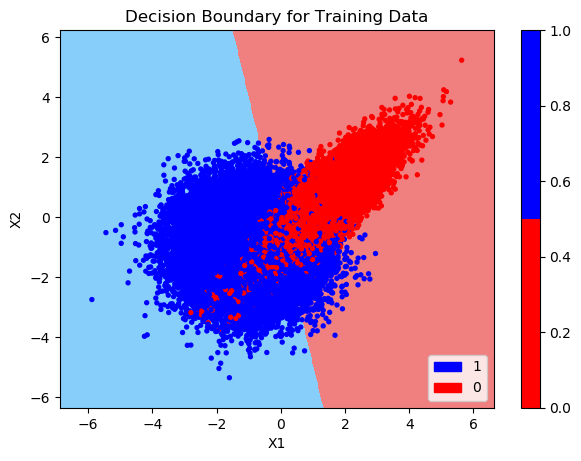

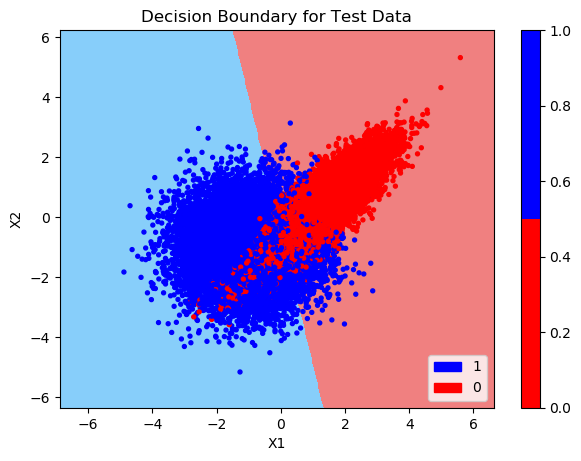

In [62]:
# Import colors
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
cmap_back = ListedColormap(['lightcoral','lightskyblue'])
cmap_front = ListedColormap(['red','blue'])

# Set color labels
blue = mpatches.Patch(color='blue', label= '1')
red = mpatches.Patch(color='red', label= '0')

# Plot training data
plt.figure(figsize = (7,5), dpi = 100)
plt.pcolormesh(xx1,xx2,bound_prob,cmap = cmap_back)
plt.scatter(x_train[:,0],x_train[:,1], c = y_train, cmap = cmap_front, s = 8)
plt.legend(handles = [blue, red], loc = 'lower right')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary for Training Data')
plt.colorbar()
plt.show()

# Plot test data
plt.figure(figsize = (7,5), dpi = 100)
plt.pcolormesh(xx1,xx2,bound_prob,cmap = cmap_back)
plt.scatter(x_test[:,0],x_test[:,1], c = y_test, cmap = cmap_front, s = 8)
plt.legend(handles = [blue, red], loc = 'lower right')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary for Test Data')
plt.colorbar()
plt.show()

Based on the above plots, the decision boundary is not very effective at separating the classes due to the large amount of overlap. We can see many points of both classes beyond the boundary of the opposite class. We may need a different type of model to better classify the data or we may need to transform the data to improve the separation. 

**(o)**

The model is retrained on the entire dataset and used to make predictions on the test set. The ROC plot is shown below. 

In [63]:
# (o) Performance on test data
from sklearn import metrics

# Full training data model (from earlier)
train_log = logistic(x_train,y_train)
w_train = train_log.gradient_descent(eta, stop)[0]

# Make predictions on test set
test_fit = logistic(x_test,None)
test_pred = test_fit.probability(w_train)

# AUC
fpr,tpr,threshold = metrics.roc_curve(y_test, test_pred, pos_label = 1)
print(f'The AUC for the test set is {round(metrics.auc(fpr,tpr),4)}')

The AUC for the test set is 0.935


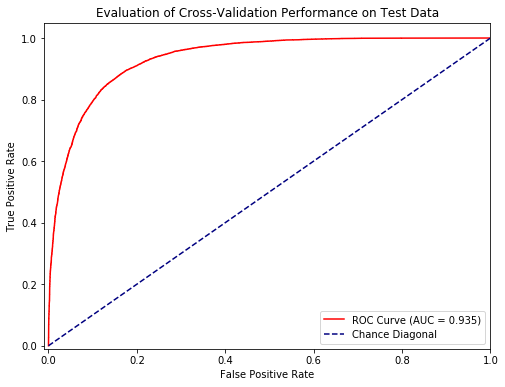

In [64]:
# Plot ROC curve
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, color = 'red', label = f'ROC Curve (AUC = {round(metrics.auc(fpr,tpr),4)})')
plt.plot([0,1],[0,1],color = 'navy', linestyle = '--', label = 'Chance Diagonal')
plt.xlim(-0.01,1)
plt.ylim(-0.01,1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Evaluation of Cross-Validation Performance on Test Data')
plt.legend(loc = 'lower right')
plt.show()

The performance on the test set is very high with an AUC of 0.935. This is much higher than random guessing, shown by the chance diagonal which has an AUC of 0.5. 

## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class (i.e. class $y=0$, which are not 3's and class $y=1$ which are 3's), from the training dataset.

**(c)** How many examples are present in each class? Show a histogram of samples by class. Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

**ANSWER**

**(a)** The dataset was loaded through the TensorFlow library. 

In [65]:
# a) Load dataset through tensorflow/keras
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# Confirm dataset
print(f'Training image data size: {x_train.shape}')
print(f'Test image data size: {x_test.shape}')

Training image data size: (60000, 28, 28)
Test image data size: (10000, 28, 28)


In [66]:
import numpy as np

# Classify labels of 3 vs. not 3
y_train_3 = np.where(y_train == 3, 1, 0)
print(f'There are {sum(y_train == 3)} 3s out of {len(y_train)} numbers in the training dataset.')
y_test_3 = np.where(y_test == 3, 1, 0)
print(f'There are {sum(y_test == 3)} 3s out of {len(y_test)} numbers in the training dataset.')

There are 6131 3s out of 60000 numbers in the training dataset.
There are 1010 3s out of 10000 numbers in the training dataset.


**(b)** A plot of 10 examples from each class in the training dataset is shown below. 

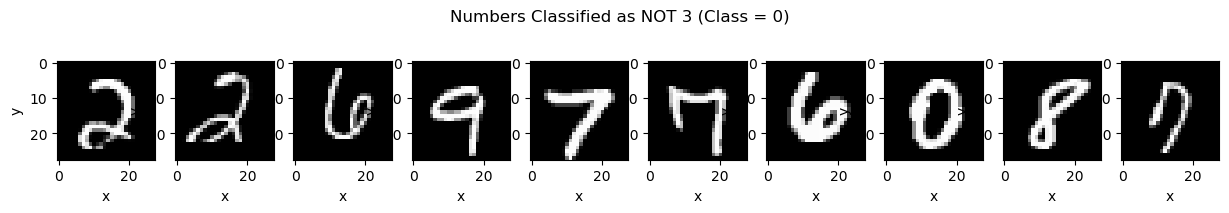

In [67]:
# (b) Plot 10 examples
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(123)
# Classified as not 3 (class 0)
x_train_sample = x_train[y_train_3 == 0]
rand_index = np.random.choice(x_train_sample.shape[0], 10, replace = False)

# Plot samples in a loop
fig, ax = plt.subplots(1,10, figsize = (15,15), dpi = 100)
fig.suptitle('Numbers Classified as NOT 3 (Class = 0)')
fig.subplots_adjust(top = 1.7)
for i in range(10):
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('y')
    ax[i].imshow(x_train_sample[rand_index[i]], cmap = 'gray')
plt.show()

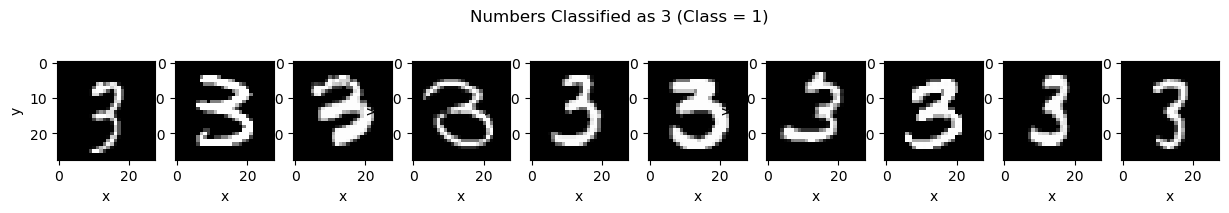

In [68]:
# Classified as 3 (class 1)
x_train_sample3 = x_train[y_train_3 == 1]
rand_index = np.random.choice(x_train_sample3.shape[0], 10, replace = False)

# Plot samples in a loop
fig, ax = plt.subplots(1,10, figsize = (15,15), dpi = 100)
fig.suptitle('Numbers Classified as 3 (Class = 1)')
fig.subplots_adjust(top = 1.7)
for i in range(10):
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('y')
    ax[i].imshow(x_train_sample3[rand_index[i]], cmap = 'gray')
plt.show()

**(c)** There are 6131 3s out of 60000 numbers in the training dataset. This disparity is visually shown in the bar chart below. These classes are not balanced, which could lead to misleading results. The model will be less able to accurately predict 3s because of the lack of data, but should be better able to predict numbers that are not 3. We will have to assess the precision and recall to better interpret the model's performance. The accuracy will be skewed by the large number of 0s in the dataset.

In [69]:
# (c) Compare classes
print(f'There are {sum(y_train == 3)} 3s out of {len(y_train)} numbers in the training dataset.')

There are 6131 3s out of 60000 numbers in the training dataset.


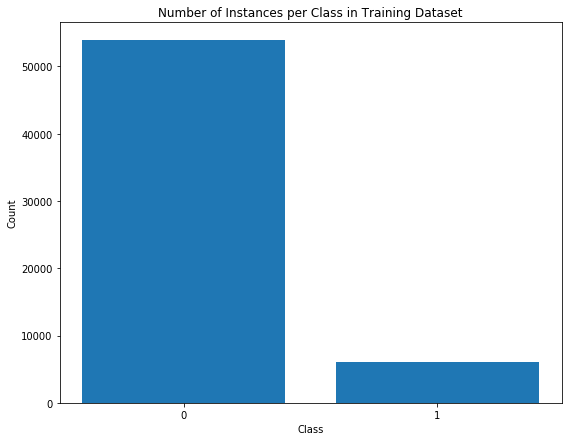

In [70]:
# Create bar chart
labels = ['0','1']
values = [sum(y_train != 3),sum(y_train == 3)]
plt.figure(figsize = (9,7))
plt.bar(labels, values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of Instances per Class in Training Dataset')
plt.show()

**(d)** Cross-validation was performed on the training dataset using 5 folds, and ROC and PR curves are shown below. The tolerance was increased to 5e-3 to better help the model converge.  

In [71]:
# (d) Train and test classifier (logistic regression)
from sklearn.linear_model import LogisticRegression

# Reshape matrices for cross validation
x_train = x_train.reshape(len(x_train),784,)
x_test = x_test.reshape(len(x_test),784,)

In [74]:
# Import cross validation method
from sklearn import model_selection

# Create 5 folds
kf = model_selection.StratifiedKFold(n_splits = 5, shuffle = True)
preds = np.empty(y_train_3.shape[0],dtype = 'object')

# Perform cross validation
for train_ind, val_ind in kf.split(x_train, y_train_3):
    # Extract training and validation data for fold
    x_train_cv, x_val_cv = x_train[train_ind], x_train[val_ind]
    y_train_3_cv, y_val_3_cv = y_train_3[train_ind], y_train_3[val_ind]
    
    # Create logistic regression objects
    log_train = LogisticRegression(tol = 5e-4)
    log_train.fit(x_train_cv,y_train_3_cv)
    
    # Predict probabilities on validation fold and add to array
    preds[val_ind] = log_train.predict_proba(x_val_cv)[:,1]

The AUC for the cross-validation is 0.9741
The AUC for predicting all non-3s is 0.5


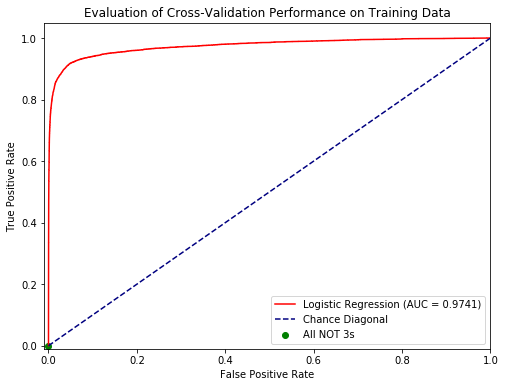

In [75]:
# Plot ROC Curves
from sklearn import metrics

# AUC
fpr,tpr,threshold = metrics.roc_curve(y_train_3, preds, pos_label = 1)
print(f'The AUC for the cross-validation is {round(metrics.auc(fpr,tpr),4)}')

# AUC of all NOT 3s
y_class0 = np.zeros(60000,)
fpr_0,tpr_0,threshold_0 = metrics.roc_curve(y_train_3,y_class0,pos_label=1)
print(f'The AUC for predicting all non-3s is {round(metrics.auc(fpr_0,tpr_0),4)}')

# Plot ROC curve
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, color = 'red', 
         label = f'Logistic Regression (AUC = {round(metrics.auc(fpr,tpr),4)})')
plt.scatter(0,0,color = 'green', label = 'All NOT 3s')
plt.plot([0,1],[0,1],color = 'navy', linestyle = '--', label = 'Chance Diagonal')
plt.xlim(-0.01,1)
plt.ylim(-0.01,1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Evaluation of Cross-Validation Performance on Training Data')
plt.legend(loc = 'lower right')
plt.show()

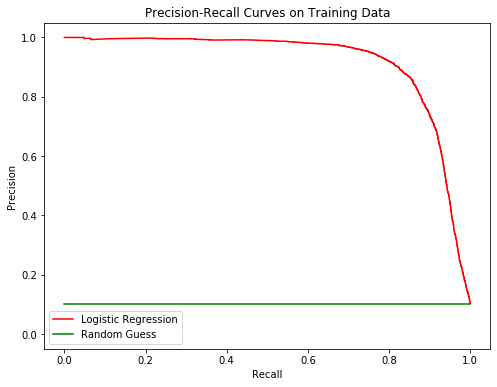

In [76]:
# Precision-Recall Curves

# Logistic 
pre, rec, thres = metrics.precision_recall_curve(y_train_3,
                                                 preds)

# Random guess - find proportion of positives in dataset
pos_prop = len(y_train_3[y_train_3 == 1])/len(y_train_3)

# Plot Curves
plt.figure(figsize = (8,6))
plt.plot(rec, pre, color = 'red', label = f'Logistic Regression')
plt.plot([0,1],[pos_prop,pos_prop,], color = 'green',
        label = 'Random Guess')
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves on Training Data')
plt.legend(loc = 'lower left')
plt.show()

Based on the above plots, the algorithm appears to strong performance since the AUC is 0.9745. However, due to the large imbalance between the classes, this result may be initially slightly misleading and optimistic. When all a classifier predicts only non-3s, i.e. a class of only 0s, both the true positive rate and false positive rate are always 0. Therefore, the ROC plot for this classifier is just a point at (0,0). The random classifier's ROC curve is represented by the chance diagonal since the classifier will predict true and false positives at an equal rate.  

The precision-recall curve gives strong support to high performance by the algorithm and shows that the model can simultaneously obtain about 90% recall and precision. Predicting all observations as class 0 actually leads to an undefined curve because the precision, determined as $\frac{TP}{TP+FP}$, will be undefined since no positives will be predicted. Therefore, there is no PR for this classifier. The random classifier has performance defined by $\frac{P}{P+N}$, as seen by this [article](https://classeval.wordpress.com/introduction/introduction-to-the-precision-recall-plot/). For this dataset, there are 6131 positive values out of 60000 data points, so the PR curve for the classifier is a horizontal line with a value of $\frac{6131}{60000} = 0.1022$. 

**(e)** Lasso regularization is applied to the logistic regression model and the performance is evaluated. Parameters were chosen on a logarithmic scale to capture the effect of regularization on a large scale. The plots evaluating performance of lasso regularization are labelled and shown below.

In [77]:
# (e) Train logistic regression using lasso 

# Initialize metric lists
nonzero_params = []
costs = []
f1_scores = []
aucs = []

# Create regularization parameter list
reg_params = np.logspace(-1, 5, 7)
reg_params

array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05])

In [78]:
# Loop and create logsitic regression models based on regularization parameters
for c in reg_params:
    # Create logistic regressions with l1 penalty
    log_lasso = LogisticRegression(penalty = 'l1', C = c**-1, solver = 'liblinear')
    log_lasso_fit = log_lasso.fit(x_train, y_train_3)
    
    # Make predictions
    test_preds = log_lasso_fit.predict(x_test)
    test_probs = log_lasso_fit.predict_proba(x_test)[:,1]
    
    # Nonzero parameters
    nonzero_params.append(np.count_nonzero(log_lasso_fit.coef_))
    
    # Cost - requires initialization from logistic class in question 1
    w = np.append(log_lasso_fit.intercept_, log_lasso_fit.coef_)
    costs.append(logistic(x_test, y_test_3).cost(w))
    
    # F1 scores
    f1_scores.append(metrics.f1_score(y_test_3, test_preds, pos_label = 1))
    
    # AUCs
    aucs.append(metrics.roc_auc_score(y_test_3, test_probs))
    pass

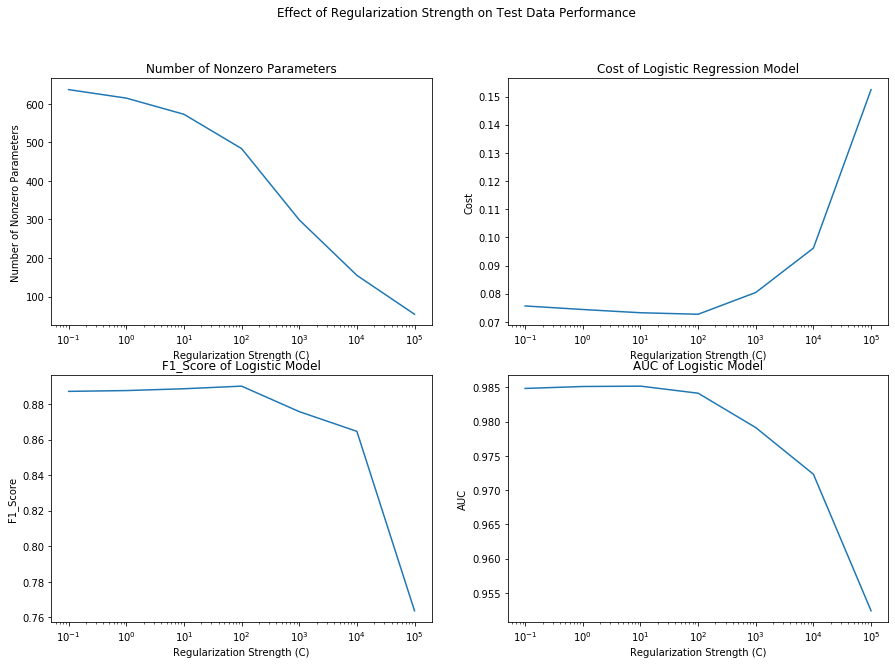

In [176]:
# Plot trends of metrics based on regularization parameters
import matplotlib.pyplot as plt

# Create subplots
plt.figure(figsize = (15, 10))
plt.suptitle('Effect of Regularization Strength on Test Data Performance')

# Nonzero parameters
plt.subplot(2,2,1)
plt.plot(reg_params, nonzero_params)
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Number of Nonzero Parameters')
plt.xscale("log")
plt.title('Number of Nonzero Parameters')

# Costs
plt.subplot(2,2,2)
plt.plot(reg_params, costs)
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Cost')
plt.xscale("log")
plt.title('Cost of Logistic Regression Model')

# F1 scores
plt.subplot(2,2,3)
plt.plot(reg_params, f1_scores)
plt.xlabel('Regularization Strength (C)')
plt.ylabel('F1_Score')
plt.xscale("log")
plt.title('F1_Score of Logistic Model')

# AUCs
plt.subplot(2,2,4)
plt.plot(reg_params, aucs)
plt.xlabel('Regularization Strength (C)')
plt.ylabel('AUC')
plt.xscale("log")
plt.title('AUC of Logistic Model')
plt.show()

From the above plot, we can see several key trends. Regularization aims to decrease variance by shrinking coefficients toward zero. As the regularization increases, the number of nonzero parameters decreases as expected. The cost decreases and appears to reach its minimum when C = 100. We also see the highest F1-score around C = 100 and a high AUC around C = 100 also. These plots also show that as the regularization increases past C = 100, we tend to see poorer performance on the test set, indicating underfitting and greater bias due to fewer parameters. The optimal bias-variance tradeoff is thus achieved at a C of 100 since this is where the cost is minimized and the F1 score is highest based on the chosen regularization parameters. 

## 3

### [10 points] Comparing the Bayes' decision rule with logistic regression

The phrase "Bayes' decision rule" is often used to describe a classifier decision rule that minimizes misclassification rate (equally penalizing false positives and false negatives). In this exercise you will first determine the Bayes's decision rule for a binary classification problem where you know the likelihood of date from each class. The binary classification problem has two classes with data distributed as exponential random variables:

$$P(x|C_i) = \lambda_i e^{-\lambda_i x}$$

Where $C_i$ represents the class from which the sample is drawn (0 or 1). We also know that $\lambda_0 = 1$ and $\lambda_1 = 5$.

**(a)** Plot the probability of each class conditional distribution (e.g. likelihood function), $P(x|C_0)$ and $P(x|C_1)$ on the sample plot in the domain $x \in [0,2]$. *You can use [`scipy`'s `expon` module](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon) for this. Note that the `scale` parameter for this module is defined as $1/\lambda$.*

**(b)** Assuming the prior class distributions are $P(C_0)=P(C_1)=0.5$, determine the Bayes' decision rule using the information above including the posterior distributions and the prior distributions. You will assign the most probable class to the data based on the value of $x$. The decision rule will be of the form: 

If $x > x^*$, then predict Class 0, otherwise predict Class 1

Determine the value $x^*$ that minimizes misclassification (equally penalizing false positives and false negatives, and no penalty/reward for correct detections). Show your work in deriving this value.

**(c)** How does your answer in (b) relate to the the plot you made in (a)? Why?

**(d)** Load the test data in the file `A3_Q3_test.csv`. Apply your decision rule to the data. What is the misclassification rate (error rate, or fraction of misclassified samples) of this decision rule?

**(e)** Load the training data in the file `A3_Q3_train.csv` and train a logistic regression classifier on the data (using default parameters). What is your misclassification error for your test dataset? How does this compare with the Bayes' classifier?

**(f)** What is your decision rule for your logistic regression model? To compute this, extract the parameters from your fit model (look for the `coef_` and `intercept_` attributes) and since the classes are balanced, the decision rule will be to classify a sample $x$ as Class 1 when your logistic regression sigmoid is greater than 0.5 (the halfway point from the two extremes of 0 and 1). How does this compare with the Bayes' classifier?

**(g)** If the prior probabilities were not $P(C_0)=P(C_1)=0.5$, but instead if P(C_1)>P(C_0). How would this impact the optimal decision rule? Would it change, if so, would $x^*$ be larger or smaller?

**ANSWER**

**(a)** The probability distributions for the class conditionals of $P(x|C_0)$ and $P(x|C_1)$ are shown below. 

In [177]:
# (a) 
import numpy as np
from scipy.stats import expon

# Initialize lambdas 
lamb = [1,5]

# Create range of x
x = np.linspace(0,2,1000)

# Make distributions
expon_0 = expon.pdf(x, scale = 1/lamb[0])
expon_1 = expon.pdf(x, scale = 1/lamb[1])

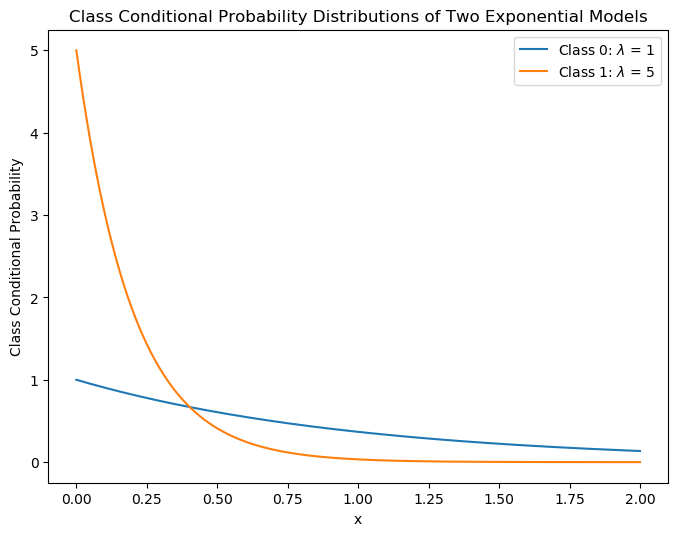

In [181]:
# Plot distributions
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,6), dpi = 100)
plt.plot(x, expon_0, label = 'Class 0: $\lambda$ = 1')
plt.plot(x, expon_1, label = 'Class 1: $\lambda$ = 5')
plt.xlabel('x')
plt.ylabel('Class Conditional Probability')
plt.title('Class Conditional Probability Distributions of Two Exponential Models')
plt.legend()
plt.show()

**(b)** The value of x* is determined by setting the posterior probabilities of the two classes equal to each other. Values where x is greater than x* will be assigned to class 0. This is accomplished using Bayes' Rule, indicated by the following formula:

$$P(C_i|x) = \frac{P(x|C_i)P(C_i)}{P(x)}$$
where $P(C_i|x)$ is the posterior probability, $P(x|C_i)$ is the likelihood, $P(C_i)$ is the prior, and $P(x)$ is the evidence. 

The posteriors for each distribution are determined as follows:
$$P(C_0|x) = \frac{P(x|C_0)P(C_0)}{P(x)} = \frac{e^{-x} \cdot 0.5}{e^{-x} \cdot 0.5 + 5e^{-5x} \cdot 0.5}$$
$$P(C_1|x) = \frac{P(x|C_1)P(C_1)}{P(x)} = \frac{5e^{-5x} \cdot 0.5}{e^{-x} \cdot 0.5 + 5e^{-5x} \cdot 0.5}$$

Setting these posteriors equal, we can determine the value of x that corresponds to x*:
$$\frac{e^{-x} \cdot 0.5}{e^{-x} \cdot 0.5 + 5e^{-5x} \cdot 0.5} = \frac{5e^{-5x} \cdot 0.5}{e^{-x} \cdot 0.5 + 5e^{-5x} \cdot 0.5}$$
$\ $
$$ e^{-x} = 5e^{-5x}$$
$$ \frac{1}{5} = e^{-4x}$$
$$ x = -\text{ln}\frac{1}{5} \cdot \frac{1}{4} = 0.40236$$
$$\boxed{x^* = 0.4024}$$


When x is greater than the Bayes' boundary of 0.40236, the data will be assigned to class 1. 

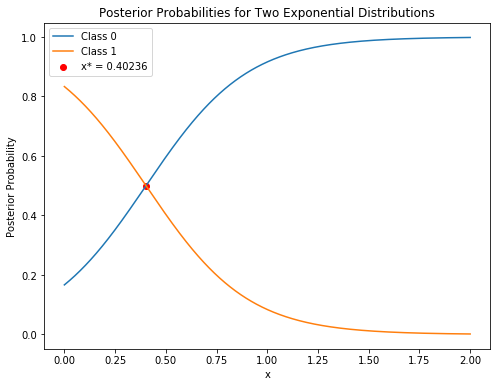

In [189]:
# (b) Use Bayes' Theorem
# Boundary 
boundary = 0.40236

# Set values
prior = 0.5
likelihood = [expon_0, expon_1]
evidence = prior*likelihood[0] + prior*likelihood[1]

# Calculate posteriors
posterior_0 = (likelihood[0]*prior)/evidence 
posterior_1 = (likelihood[1]*prior)/evidence

# Plot posteriors
plt.figure(figsize = (8,6))
plt.plot(x, posterior_0, label = 'Class 0')
plt.plot(x, posterior_1, label = 'Class 1')
plt.scatter(boundary,0.5, color = 'red', label = f'x* = {boundary}')
plt.xlabel('x')
plt.ylabel('Posterior Probability')
plt.title('Posterior Probabilities for Two Exponential Distributions')
plt.legend()
plt.show()

**(c)** 
The value of 0.40236 that was calculated using Bayes' Rule marks the intersection of the two probability distributions show in the above plot and in part (a). This boundary marks the point where the class posterior probabilities are equal at 0.5, and when the probability is greater than 0.5, the data will be assigned to class 1. When looking at the class conditional probabilities in part (a), we see that for x values less than 0.40236, the cumulative probability is much higher for class 1, so a data point in this region is more likely to be assigned to class 1. Beyond this point, the probability of belong to class 0 is higher. 

**(d)** After applying the boundary rule to the data, we find that the misclassification rate is 0.23395. 

In [191]:
# (d) Apply decision rule to data
import pandas as pd

# Load data
q3_test = pd.read_csv("A3_Q3_test.csv")

# Create new classifications
q3_test['y_hat'] = ((q3_test['x'] < boundary) == 1).astype(int)

# Misclassification rate
error_bayes = sum(q3_test['y'] != q3_test['y_hat'])/len(q3_test['y'])
print(f'The misclassification rate on the test data when using the decision rule is {error_bayes}.')

The misclassification rate when using the decision rule is 0.23395


**(e)** When training a logistic model on the data, we find that the error rate is 0.234, which is slightly higher than the Bayes' error rate. Since the Bayes' error rate is the optimal error rate, we should expect the error from logistic regression to be greater, but these two values are very close for this data.

In [211]:
# (e) Training data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Load data
q3_train = pd.read_csv('A3_Q3_train.csv')[['x','y']].to_numpy()
q3_train.reshape(-1,1)

# Train logistic model 
q3_train_log = LogisticRegression()
q3_train_fit = q3_train_log.fit(q3_train[:,0].reshape(-1,1),q3_train[:,1])

# Predict on test data and calculate error 
preds = q3_train_fit.predict(q3_test['x'].to_numpy().reshape(-1,1))
error_log = 1 - metrics.accuracy_score(q3_test['y'].to_numpy(),preds)
print(f'The misclassification rate when using logistic regression is {error_log:.3f}.')

The misclassification rate when using logistic regression is 0.234.


**(f)** The logistic regression function assigns data to classes depending on if the predicted probability is greater than 0.5. This probability is predicted using the sigmoid function. We can derive the boundary from the parameters of the logistic regression model as follows:
$$0.5 = \frac{1}{1+e^{-(w_0+w_1x)}}$$
$ \ $
$$0.5(1+1+e^{-(w_0+w_1x)}) = 1$$
$ \ $
$$e^{-(w_0+w_1x)} = 1$$
$ \ $
$$-w_0-w_1x = 0$$
$ \ $
$$w_0 = -w_1x$$
$ \ $
$$x = -\frac{w_0}{w_1}$$

From this derivation, we can extract the coefficients and calculate the decision boundary used by the logistic regression model. 

In [270]:
# (f) Logistic Decision Boundary

# Find coef and intercept
coef = q3_train_fit.coef_
intercept = q3_train_fit.intercept_

# Compute boundary
log_bound = -(intercept/coef)
print(f'The decision boundary used by the logistic regression is {np.asscalar(log_bound):.4f}.')

The decision boundary used by the logistic regression is 0.4033.


The decision boundary of the logistic regression model is 0.4033, which is close to the Bayes' boundary of 0.40236. We would not expect it to be exact since the Bayes' boundary is the optimal rate, but the proximity of the values suggests strong classification ability of the logistic regression. 

**(g)** 

Having a higher prior for class 1 would result in a larger posterior for class 1. This would cause x* to increase since the probability of being assigned to class 1 would be higher. This is demonstrated in the plot below, where x* was estimated by finding the intersection of the posterior probability curves. The estimated value of x* is 0.6146, which is greater than the x* value 0.40236 that corresponded to equal priors for both distributions.

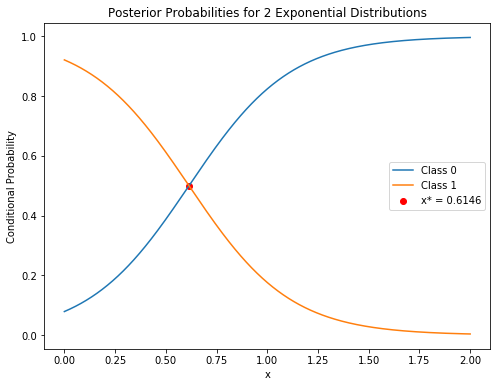

In [216]:
prior = [0.3, 0.7]
likelihood = [expon_0, expon_1]
evidence = prior[0]*likelihood[0] + prior[1]*likelihood[1]

# Calculate posteriors
posterior_0 = (likelihood[0]*prior[0])/evidence 
posterior_1 = (likelihood[1]*prior[1])/evidence

# Find intersection index (minimum classification value)
int_ind = np.where(abs(posterior_0 - posterior_1) == abs(posterior_0 - posterior_1).min())

# Plot posteriors
plt.figure(figsize = (8,6))
plt.plot(x, posterior_0, label = 'Class 0')
plt.plot(x, posterior_1, label = 'Class 1')
plt.scatter(x[int_ind],posterior_0[int_ind], color = 'red', 
            label = f'x* = {np.asscalar(x[int_ind]):.4f}')
plt.xlabel('x')
plt.ylabel('Conditional Probability')
plt.title('Posterior Probabilities for 2 Exponential Distributions')
plt.legend()
plt.show()

## 4

### [30 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. You're encouraged to be creative.

**(b)** Download the data and plot the data to describe it. You can use any dataset of interest to you with the exception of the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset. Possible sources of dataset include (but are not limited to):

- [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)
- [Kaggle Datasets](https://www.kaggle.com/datasets)
- [Amazon Open Datasets](https://registry.opendata.aws/)
- [Microsoft's Open Data](https://msropendata.com/)
- [Google's Dataset Search](https://datasetsearch.research.google.com/)
- [Awesomedata's list of datasets](https://github.com/awesomedata/awesome-public-datasets)

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, where it did not, and how you could improve it. Summarize the conclusions from your work (this should involve a degree of interpretation more so than "my classifier achieved an AUC of 0.8").

*This grade for this question is based on (a) the completeness of the answer in addressing each of the above components, (b) the quality of the work and accuracy of the interpretation of the results of the analysis, (c) the presentation and professionalism of the work, and (d) the amount of creativity demonstrated by the work.*

**ANSWER**

**(a)** One of the most interesting aspects of automobiles is their fuel efficiency. As someone with an interest in cars, I am curious to learn more about some of the factors that improve their performance, particularly with regard to speed and mileage. Based on factors such as a car's engine type or model, among others, it is possible that we can predict its mileage and fuel efficiency through regression. This is the problem that I will explore here. 


**(b)** The dataset was taken from UCI's Machine Learning repository and can be found [here](https://archive.ics.uci.edu/ml/datasets/Auto+MPG). This simple dataset should allow for supervised learning through linear regression. The data contains the following attributes: 
1. mpg
2. Cylinders 
3. Displacement (cu in)
4. Horsepower (hp)
5. Weight (lbs)
6. Acceleration (0 - 100 mph)
7. Model Year
8. Origin
9. Car name

The attributes did not have units listed in the data dictionary, but research on several of the cars helped to clarify what the values of the units should be. The data is loaded and explored for preprocessing. 

In [360]:
# (b)
# Import dataset and create column labels
import pandas as pd
import numpy as np
auto = pd.read_csv("auto-mpg.data", sep= "\s+", 
                  names = ['mpg','Cylinders','Displacement','Horsepower',
                           'Weight','Acceleration','Model_Year',
                           'Origin','Car Name'])
auto.head() 

,mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### Preprocessing

Prior to creating a supervised learning model, the data must first be explored and preprocessed. Summary statistics help determine the scale of the variables as well as any missing data.

In [361]:
# Missing values
print('Number of missing values:')
print(auto.isnull().sum())

Number of missing values:
mpg             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model_Year      0
Origin          0
Car Name        0
dtype: int64


Initial inspect of the columns indicates no missing data. However, according to additional analysis and the data dictionary, there are several rows where the horsepower is missing but labeled as "?" and therefore not considering missing data. To ensure consistent analysis, the observations that contain these missing horsepower values will be removed, bring the total length of the dataset from 398 to 392.  

In [362]:
# Remove rows with missing horsepower values
auto_clean = auto.copy()
auto_clean = auto_clean[auto_clean['Horsepower'] != '?']

# Convert horsepower column to type float after cleaning
auto_clean['Horsepower'] = auto_clean['Horsepower'].astype(float)

In [363]:
# Determine countries of origin and relabel
auto_clean['Origin'] = auto_clean['Origin'].replace({1:'US',2:'Europe',3:'Japan'})

In [364]:
# Summary statistics
print()
print('Summary Statistics')
print(auto_clean.describe())


Summary Statistics
              mpg   Cylinders  Displacement  Horsepower       Weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       Acceleration  Model_Year  
count    392.000000  392.000000  
mean      15.541327   75.979592  
std        2.758864    3.683737  
min        8.000000   70.000000  
25%       13.775000   73.000000  
50%       15.500000   76.000000  
75%       17.025000   79.000000  
max       24.800000   82.000000  


The observations corresponding to missing horsepower data has been addressed. However, the variables are on much different scales, so we will need to normalize after creating a training and test split. It is also clear that origin is a categorical variable, so the exact countries will need to be determined. Exploration of the data revealed that origins of "1","2", and "3" correspond to the US, Europe, and Japan, respectively. 

**(c)** The main predictor of interest is miles per gallon, and predictors include the following: Cylinders, Displacement, Horsepower, Weight, Acceleration, Model Year, and Origin. The missing horsepower data has been cleaned as described earlier. Prior to creating the supervised learning algorithm, the preprocessed data is explored visually to see what effects the predictors variables might have on the response variable. Several plots of the key variables are shown below. 

The response variable will be miles per gallon (mpg), and the distribution of mpg in the data is shown below. For linear regression to be valid, we need the distribution of the response variable to be roughly normal. Though it is slightly skewed right, the distribution is normal enough that linear regression should be valid. 

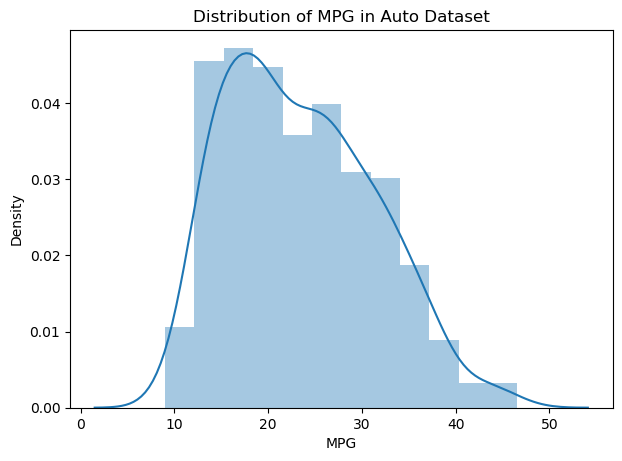

In [365]:
# Plot data
import matplotlib.pyplot as plt
import seaborn as sns

# MPG Distribution
plt.figure(figsize = (7,5), dpi = 100)
sns.distplot(auto_clean['mpg'])
plt.xlabel('MPG')
plt.ylabel('Density')
plt.title('Distribution of MPG in Auto Dataset')
plt.show()

It is also important to check the balance of several other predictors in the dataset, such as number of cylinders and origin. A balanced dataset allows for greater generalizability when creating the supervised learning model. Additional plots are shown below. 

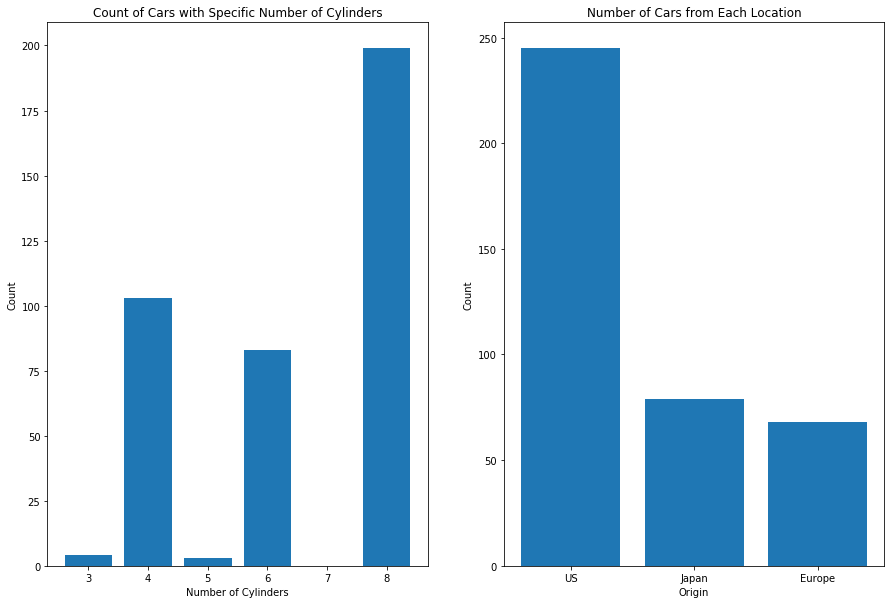

In [366]:
# Plot discrete variable counts
plt.figure(figsize = (15,10))

# Cylinders
plt.subplot(1,2,1)
cylinder_list = auto_clean['Cylinders'].unique().tolist()
cylinder_counts = auto_clean['Cylinders'].value_counts().tolist()
plt.bar(cylinder_list, cylinder_counts)
plt.xlabel('Number of Cylinders')
plt.ylabel('Count')
plt.title('Count of Cars with Specific Number of Cylinders')

# Origin
plt.subplot(1,2,2)
origin_list = auto_clean['Origin'].unique().tolist()
origin_counts = auto_clean['Origin'].value_counts().tolist()
plt.bar(origin_list, origin_counts)
plt.xlabel('Origin')
plt.ylabel('Count')
plt.title('Number of Cars from Each Location')
plt.show()

Based on the above barplots, there is a decent balance between the main engine types of 4-,6-, and 8-cylinder. There are very few 3- and 5-cylinder engine cars. There are also many more American cars than European or Japanese. 

A correlation matrix can be generated to determine correlations between the continous variables. This plot is shown below.

In [367]:
# Correlation matrix 
corr_mat = auto_clean.corr()
corr_mat.style.background_gradient(cmap='coolwarm')

,mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year
mpg,1,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
Cylinders,-0.777618,1,0.950823,0.842983,0.897527,-0.504683,-0.345647
Displacement,-0.805127,0.950823,1,0.897257,0.932994,-0.5438,-0.369855
Horsepower,-0.778427,0.842983,0.897257,1,0.864538,-0.689196,-0.416361
Weight,-0.832244,0.897527,0.932994,0.864538,1,-0.416839,-0.30912
Acceleration,0.423329,-0.504683,-0.5438,-0.689196,-0.416839,1,0.290316
Model_Year,0.580541,-0.345647,-0.369855,-0.416361,-0.30912,0.290316,1


The correlation matrix above shows that mpg appears to decrease with more weight and engine power but increases with the model year. There is also high correlation between different parts of the engine, such as the cylinders and displacement, so many of these variables will be dropped during prediction. 

**(d)** Because the predicted variable of interest (mpg) is a continuous variable with a fairly normal distribution, linear regression will be used as the supervised learning method. 

**(e)** The performance of the linear regression will be evaluated using $R^2$ and mean squared error. The regression will be trained on a subset of data and then evaluated on test data. 

**(f)** The dataset will be divided into an 80% train and 20% test split. This approach will be used to determine how well the trained linear regression model can perform on new test data. The performance on both training and test will be compared to determine the generalizability of the model. The column corresponding to car name will be dropped. The number of cylinders will be considered as a category since the cars can be categorized depending on how many cylinders their engine has. Because of the categorical data (number of cylinders, origin, and model year), one-hot encoding is required before splitting. 

In [452]:
# Encode categorical data using one-hot encoding via pd.get_dummies
categories = ['Cylinders','Origin','Model_Year']
auto_mod = auto_clean.copy()

for cat in categories:
    auto_mod = pd.get_dummies(auto_mod, columns = [cat],drop_first = True)
    pass

# Drop Car name column
auto_mod = auto_mod.drop(columns = ['Car Name'])

In [453]:
# Create numpy arrays from dataframe
y = auto_mod.iloc[:,0].values
x = auto_mod.iloc[:, 1:].values

After encoding the categorical data, the dataset is split into train and test. A standard scaler is used to standardized all the continous variables based on the training set. This transformation is then applied to the test set. 

In [454]:
# Import sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

# Scale based on training data 
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

### Supervised Learning

**(g)** After scaling the data, the linear regression model is fit on the training data. Performance is measured on both the training and test data by the adjusted $R^2$ and the mean-squared-error. There are no plots that can be used to quantify the performance of the multiple linear regression model. 

In [455]:
# Import linear regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Train model
reg = LinearRegression()
reg.fit(x_train,y_train)

# Performance on train data
pred_train = reg.predict(x_train)
train_r2 = metrics.r2_score(y_train,pred_train)
train_mse = metrics.mean_squared_error(y_train, pred_train)
print(f'The MSE for the model on the training data is {train_mse:.4f}') 
print(f'The R2 for the model on the training data is {train_r2:.4f}')

# Performance on test data
pred_test = reg.predict(x_test)
test_r2 = metrics.r2_score(y_test, pred_test)
test_mse = metrics.mean_squared_error(y_test, pred_test)
print()
print(f'The MSE for the model on the test data is {test_mse:.4f}') 
print(f'The R2 for the model on the test data is {test_r2:.4f}')

The MSE for the model on the training data is 7.7607
The R2 for the model on the training data is 0.8741

The MSE for the model on the test data is 7.7983
The R2 for the model on the test data is 0.8636


**(h)** Overall, the linear regression model performed fairly well for this dataset with $R^2$ values of 0.8774 and 0.8184 for the training and test data, respectively. The test $R^2$ was not too much different from the training data, suggesting fairly strong generalizability to new data. The MSE was higher for the test data, but this is to be expected. One potential issue with this dataset is the strong correlation between many of the variables as seen in the correlation matrix earlier. Standardizing all the continuous variables seems to have helped address this since there were no computational errors or warnings. However, running models by removing a few variables with high correlation, like displacement and number of cylinders, or applying a regularization method like lasso could help reduce the number of parameters in the model. This may help reduce overfitting to the training data and could improve test performance as long as the bias does not become too large. Future work would involve deeper investigation into how to optimize the number of parameters to further reduce variance and improve test performance. As an aside, all the cars in this dataset are quite old (most recent car in dataset is from 1982), so it would be interesting to see how this model might apply to more modern cars. 